In [1]:
import requests
from bs4 import BeautifulSoup
import pickle
def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find(class_="ast-container").find_all('p')]
    print(url)
    return text
# URLs of transcripts in scope
urls = ['http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/']
transcripts = [url_to_transcript(u) for u in urls]
print(len(transcripts))

http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/
http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/
http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/
3


In [2]:
data = {}
comedians = ['louis', 'dave', 'ricky']
for i,c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)
data

{'louis': ['Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all.',
  '“The Old Lady And The Dog”\nI live– I live in New York. I always– Like, there’s this old lady in my neighborhood, And she’s always walking her dog. She’s always just– she’s very old. She just stands there just being old, And the dog just fights gravity every day, just– The two of th

In [3]:
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}
data_combined

{'louis': ['Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all. “The Old Lady And The Dog”\nI live– I live in New York. I always– Like, there’s this old lady in my neighborhood, And she’s always walking her dog. She’s always just– she’s very old. She just stands there just being old, And the dog just fights gravity every day, just– The two of them, i

In [4]:
import pandas as pd
#pd.set_option('max_colwidth',150)
data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df.transcript.loc['louis']

'Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all. “The Old Lady And The Dog”\nI live– I live in New York. I always– Like, there’s this old lady in my neighborhood, And she’s always walking her dog. She’s always just– she’s very old. She just stands there just being old, And the dog just fights gravity every day, just– The two of them, it’s really–

In [5]:
import re
import string
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text
f1 = lambda x: clean_text(x)
data_clean = pd.DataFrame(data_df.transcript.apply(f1))
data_clean
data_clean.transcript.loc['louis']

'introfade the music out lets roll hold there lights do the lights thank you thank you very much i appreciate that i dont necessarily agree with you but i appreciate very much well this is a nice place this is easily the nicest place for many miles in every direction thats how you compliment a building and shit on a town with one sentence it is odd around here as i was driving here there doesnt seem to be any difference between the sidewalk and the street for pedestrians here people just kind of walk in the middle of the road i love traveling and seeing all the different parts of the country i live in new york i live in a– theres no value to your doing that at all the old lady and the dogi live– i live in new york i always– like theres this old lady in my neighborhood and shes always walking her dog shes always just– shes very old she just stands there just being old and the dog just fights gravity every day just– the two of them its really– the dogs got a cloudy eye and shes got a clo

In [25]:
data_clean.to_pickle("corpus.pkl")

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = data_clean.index
data_dtm

,aaah,aah,ability,abject,able,abortions,accept,access,accident,accurate,...,youngest,youre,youth,youthis,youtube,youve,yulin,yummy,zero,zoo
dave,1,0,0,0,0,1,0,0,0,0,...,0,15,0,1,0,5,0,0,0,0
louis,0,3,0,0,1,0,1,2,1,1,...,0,50,1,0,1,0,0,0,2,0
ricky,0,0,1,1,2,0,0,0,0,1,...,1,41,0,0,1,10,1,1,0,1


In [28]:
data_dtm.to_pickle("dtm.pkl")

In [9]:
import pandas as pd
data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data

,dave,louis,ricky
aaah,1,0,0
aah,0,3,0
ability,0,0,1
abject,0,0,1
able,0,1,2
...,...,...,...
youve,5,0,10
yulin,0,0,1
yummy,0,0,1
zero,0,2,0


In [10]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:10]]))

dave
like, know, said, just, im, shit, people, didnt, ahah, dont
louis
like, just, know, dont, thats, youre, im, life, people, thing
ricky
right, like, just, im, dont, know, said, yeah, fucking, got


In [14]:
from collections import Counter
words = []
for comdian in data.columns:
    top = [word for (word,count) in top_dict[comdian]]
    for t in top:
        words.append(t)
Counter(words).most_common()

[('like', 3),
 ('know', 3),
 ('just', 3),
 ('im', 3),
 ('people', 3),
 ('dont', 3),
 ('thats', 3),
 ('right', 3),
 ('hes', 3),
 ('said', 2),
 ('shit', 2),
 ('didnt', 2),
 ('time', 2),
 ('fuck', 2),
 ('fucking', 2),
 ('got', 2),
 ('good', 2),
 ('gonna', 2),
 ('yeah', 2),
 ('youre', 2),
 ('thing', 2),
 ('theres', 2),
 ('theyre', 2),
 ('ahah', 1),
 ('black', 1),
 ('man', 1),
 ('gay', 1),
 ('lot', 1),
 ('nigga', 1),
 ('did', 1),
 ('oj', 1),
 ('oh', 1),
 ('come', 1),
 ('kevin', 1),
 ('life', 1),
 ('cause', 1),
 ('tit', 1),
 ('think', 1),
 ('really', 1),
 ('course', 1),
 ('kids', 1),
 ('guy', 1),
 ('murder', 1),
 ('ok', 1),
 ('mean', 1),
 ('old', 1),
 ('say', 1),
 ('went', 1),
 ('id', 1),
 ('little', 1),
 ('joke', 1),
 ('ive', 1),
 ('going', 1),
 ('years', 1),
 ('day', 1),
 ('saying', 1),
 ('ill', 1),
 ('hed', 1)]

In [15]:
stop_words = [word for (word,count) in Counter(words).most_common() if count > 2]
stop_words

['like', 'know', 'just', 'im', 'people', 'dont', 'thats', 'right', 'hes']

In [20]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [24]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

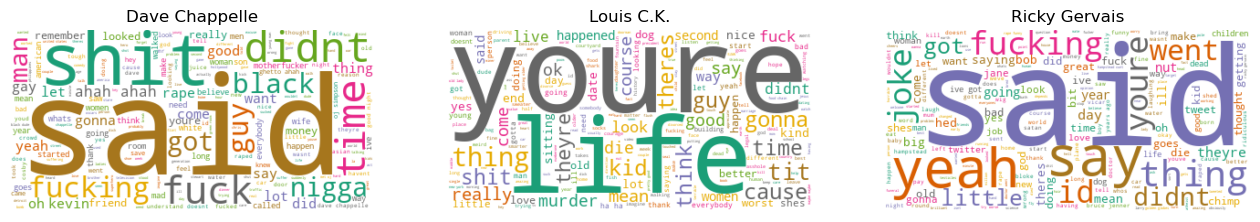

In [28]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Dave Chappelle','Louis C.K.','Ricky Gervais']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(1, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

In [29]:
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
1,Louis C.K.,1098
0,Dave Chappelle,1404
2,Ricky Gervais,1633


In [31]:
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
1,Louis C.K.,1098,3332,59,56.474576
2,Ricky Gervais,1633,4972,80,62.150000
0,Dave Chappelle,1404,4094,60,68.233333


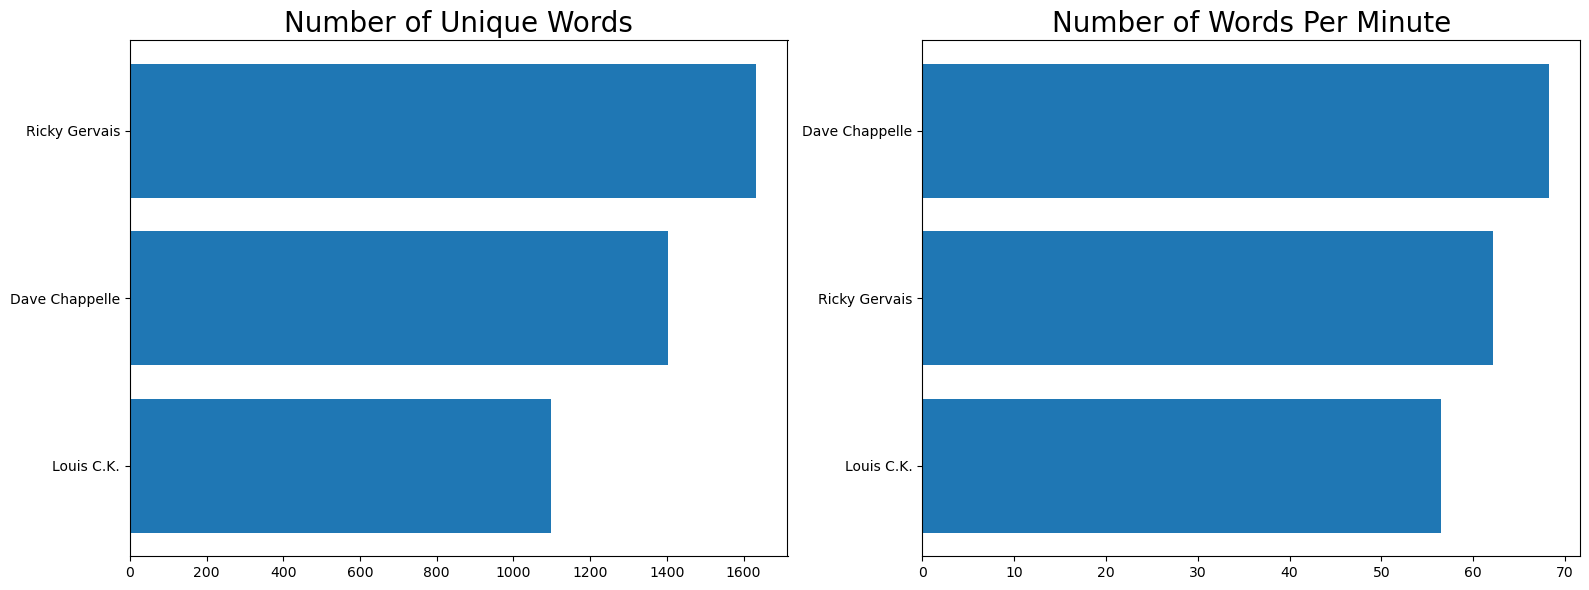

In [32]:
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

In [34]:
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
dave,65,45
louis,21,25
ricky,60,6


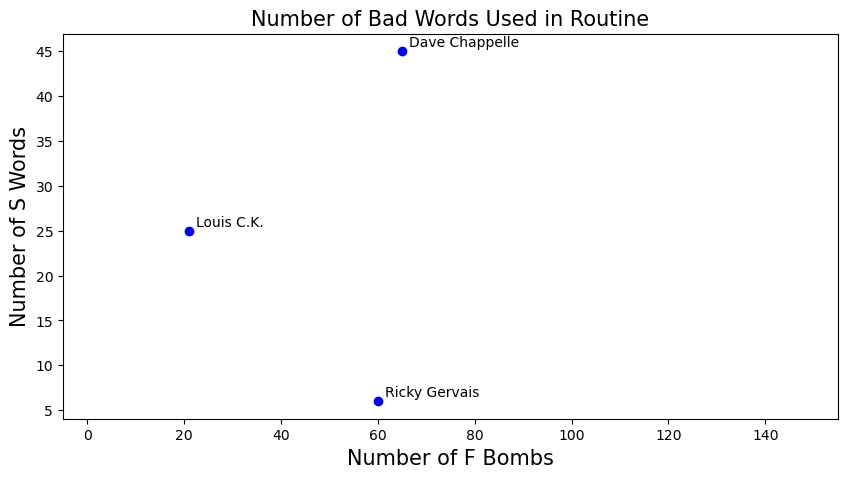

In [38]:
plt.rcParams['figure.figsize'] = [10, 5]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=15)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()